# Kapitel 03

### Deaktivieren der Warnungen

In [299]:
import warnings
warnings.filterwarnings('ignore')

In [300]:
def entscheidung(summe):
  if summe >= 1:
    return 1
  
  return 0

print('Output:', entscheidung(0))

Output: 0


### Stufenfunktion

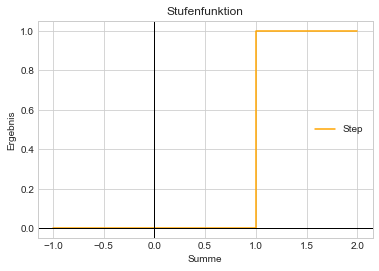

In [301]:
import matplotlib.pyplot as plt
%matplotlib inline

# x-Werte des Graphen
x = [-1, 0, 0.999, 1, 2]
# y-Werte mit der Funktion entscheidung berechnen und daraus eine neue Liste berechnen
y = [entscheidung(i) for i in x]
# Erzeugen des Graphen
plt.step(x, y, color='Orange', label='Step')

# Die Achsen setzen
plt.grid(True)
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)

# Achsenbeschriftung und Titel
plt.xlabel('Summe')
plt.ylabel('Ergebnis')
plt.title('Stufenfunktion')

plt.legend(loc='center right')

plt.show()

### Planung mit Scatterplot

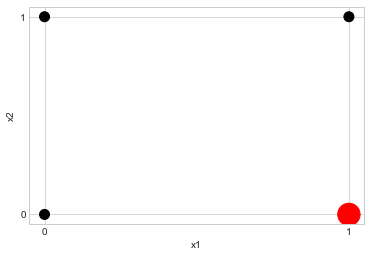

In [302]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x1 = np.array([0, 0, 1, 1])
x2 = np.array([0, 1, 0, 1])

color = np.array(['black', 'black', 'red', 'black'])
size = np.array([100, 100, 500, 100])

plt.grid(True)

# Plot zeichnen
plt.scatter(x1, x2, c=color, s=size)

# Achsen konfigurieren
plt.xlabel('x1')
plt.ylabel('x2')
plt.xticks([0.0, 1.0])
plt.yticks([0.0, 1.0])

plt.show()

### Aufgabe: Scatterplot für Iris-Datensatz aus CVS-Datei

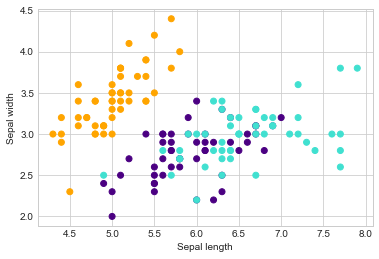

In [303]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

iris_colors = {
  'Iris-setosa': 'orange',
  'Iris-virginica': 'turquoise',
  'Iris-versicolor': 'indigo'
}

x1 = []
x2 = []
colors = []

with open('iris.csv', 'r') as fobj:
  for line in fobj:
    raw_values = line.split(',')

    if len(raw_values) == 5:
      sepal_values = [float(v) for v in raw_values[:2]]
      class_value = raw_values[4].strip()

      x1.append(sepal_values[0])
      x2.append(sepal_values[1])
      colors.append(iris_colors[class_value])


plt.grid(True)
plt.style.use('seaborn-whitegrid')
plt.scatter(x1, x2, c=colors)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()

### Anwesenheitsplan Frau Karotte und Herr Lauch

In [304]:
import numpy as np
import matplotlib.pyplot as plt

# 3-dimensionaler Input-Vektor - Bias-Neuron, Fr. Karotte, Hr. Lauch
X = np.array([
  [1, 0, 0],
  [1, 0, 1],
  [1, 1, 0],
  [1, 1, 1]
])
# Die 4 gewünschten Ergebniswerte
y = np.array([0, 1, 1, 1])

# Heaviside-Funktion
def heaviside(summe):
  if summe >= 0:
    return 1
  return 0

# Perceptron-Berechnung (Forward path)
def perceptron_eval(X, y):
  """ Perceptron-Berechnung
  Input: X, Inputvektor
         y, der gewünschte Output
  Output: Der Gesamtfehler, d. h. die Summe aus dem Betrag der Differenz
          von errechnetem und gewünschtem Output
  """
  gesamtfehler = 0
  # Die Gewichte so wählen, dass das OR-Problem gelöst werden kann
  w = np.array([-1, 1, 1])
  
  for i, x in enumerate(X):
    summe = np.dot(w, x)
    ergebnis = heaviside(summe)
    fehler = np.abs(ergebnis - y[i])
    gesamtfehler += fehler

    print('Fr. Karotte = {}, Hr. Lauch = {}, gewünschtes Ergebnis = {}, erreichtes Ergebnis = {}, Fehler = {}'.format(x[1], x[2], y[i], ergebnis, fehler))
  
  return gesamtfehler

gesamtfehler = perceptron_eval(X, y)
print('Gesamtfehler = %1d' %  (gesamtfehler))

Fr. Karotte = 0, Hr. Lauch = 0, gewünschtes Ergebnis = 0, erreichtes Ergebnis = 0, Fehler = 0
Fr. Karotte = 0, Hr. Lauch = 1, gewünschtes Ergebnis = 1, erreichtes Ergebnis = 1, Fehler = 0
Fr. Karotte = 1, Hr. Lauch = 0, gewünschtes Ergebnis = 1, erreichtes Ergebnis = 1, Fehler = 0
Fr. Karotte = 1, Hr. Lauch = 1, gewünschtes Ergebnis = 1, erreichtes Ergebnis = 1, Fehler = 0
Gesamtfehler = 0


### Aufgabe: Roboterschutz

In [305]:
import numpy as np
import matplotlib.pyplot as plt

# 3-dimensionaler Input-Vektor - Bias-Neuron, linker Sensor, rechter Sensor
X = np.array([
  [1, 0, 0],
  [1, 0, 1],
  [1, 1, 0],
  [1, 1, 1]
])

# Die 4 gewünschten Ergebniswerte
y = np.array([0, 0, 0, 1])

# Perceptron-Berechnung (Forward path)
def perceptron_roboter(X, y):
  gesamtfehler = 0
  # Die Gewichte so wählen, dass das AND-Problem gelöst werden kann
  w = np.array([-2, 1, 1])
  
  for i, x in enumerate(X):
    summe = np.dot(w, x)
    ergebnis = heaviside(summe)
    fehler = np.abs(ergebnis - y[i])
    gesamtfehler += fehler

    print('linker Sensor = {}, rechter Sensor = {}, gewünschtes Ergebnis = {}, erreichtes Ergebnis = {}, Fehler = {}'.format(x[1], x[2], y[i], ergebnis, fehler))
  
  return gesamtfehler

gesamtfehler = perceptron_roboter(X, y)
print('Gesamtfehler = %1d' %  (gesamtfehler))

linker Sensor = 0, rechter Sensor = 0, gewünschtes Ergebnis = 0, erreichtes Ergebnis = 0, Fehler = 0
linker Sensor = 0, rechter Sensor = 1, gewünschtes Ergebnis = 0, erreichtes Ergebnis = 0, Fehler = 0
linker Sensor = 1, rechter Sensor = 0, gewünschtes Ergebnis = 0, erreichtes Ergebnis = 0, Fehler = 0
linker Sensor = 1, rechter Sensor = 1, gewünschtes Ergebnis = 1, erreichtes Ergebnis = 1, Fehler = 0
Gesamtfehler = 0
